In [250]:
import cv2
import numpy as np
from PIL import Image
from IPython.display import display
import pytesseract

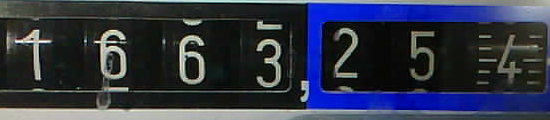

In [251]:
src = cv2.imread('plyn.jpg', cv2.IMREAD_COLOR)
src = src[210:330, 25:575] # 25,210 550x120 # y1:y2, x1:x2
display(Image.fromarray(src))

In [252]:
blue_channel = src[:,:,0]

In [253]:
no_spec=blue_channel.copy()

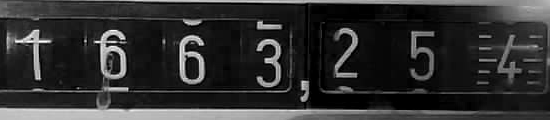

In [254]:
display(Image.fromarray(no_spec))

In [255]:
blurred = cv2.GaussianBlur(no_spec, (3, 3), 0)

In [256]:
thresh = cv2.adaptiveThreshold(blurred, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 27, -15)

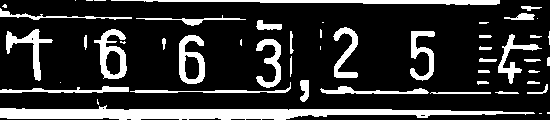

In [257]:
display(Image.fromarray(thresh))

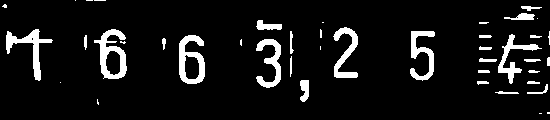

In [258]:
(contours, hierarchy) = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
for i,v in enumerate(contours):
    x,y,w,h = cv2.boundingRect(v)
    if w > 50:
         _ = cv2.drawContours(image=thresh, contours=contours, contourIdx=i, color=(0,0,0), thickness=cv2.FILLED)

display(Image.fromarray(thresh))

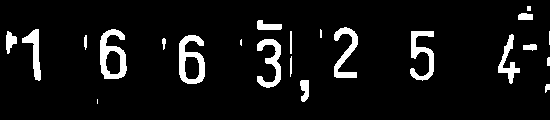

In [261]:
kernel = np.ones((5,1),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, np.ones((1,5),np.uint8))
opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel)
opening = cv2.morphologyEx(opening, cv2.MORPH_ERODE, np.ones((1,5),np.uint8))
display(Image.fromarray(opening))

In [262]:
numbers = [] # 50x100
numbers.append(opening[15:115, 10:60])
numbers.append(opening[15:115, 90:140])
numbers.append(opening[15:115, 170:220])
numbers.append(opening[15:115, 240:290])
numbers.append(opening[15:115, 320:370])
numbers.append(opening[15:115, 395:445])
numbers.append(opening[15:115, 490:540])

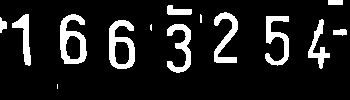

In [263]:
numpy_horizontal_concat = np.concatenate(numbers, axis=1)
display(Image.fromarray(numpy_horizontal_concat))

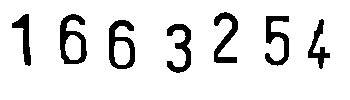

In [264]:
digits = []
for number in numbers:
    (contours, hierarchy) = cv2.findContours(image=number, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    image_copy = number.copy()
    
    contours = list(contours)
    
    m,i = max((cv2.contourArea(v),i) for i,v in enumerate(contours))
    
    _ = cv2.drawContours(image=image_copy, contours=contours, contourIdx=i, color=(255, 255,255), thickness=cv2.FILLED)
    del contours[i]
    _ = cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 0, 0), thickness=cv2.FILLED)
    
    img = cv2.bitwise_not(image_copy)
    
    digits.append(img)

numpy_horizontal_concat = np.concatenate(digits, axis=1)
display(Image.fromarray(numpy_horizontal_concat))

In [265]:
word = pytesseract.image_to_string(numpy_horizontal_concat, config='--psm 13')
print(word)

1663254

